In [7]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
import random

import readFile as rf


In [18]:

data = rf.read_red(100)
white = rf.read_white(100)
print(data)

   fixed acidity volatile acidity citric acid residual sugar chlorides  \
0            7.4             0.67        0.12            1.6     0.186   
1            8.4             0.65         0.6            2.1     0.112   
2           10.3             0.53        0.48            2.5     0.063   
3            7.6             0.62        0.32            2.2     0.082   
4           10.3             0.41        0.42            2.4     0.213   
..           ...              ...         ...            ...       ...   
95          11.5             0.59        0.59            2.6     0.087   
96           8.7            0.765        0.22            2.3     0.064   
97           6.6            0.735        0.02            7.9     0.122   
98           7.7             0.26         0.3            1.7     0.059   
99          12.2             0.48        0.54            2.6     0.085   

   free sulfur dioxide total sulfur dioxide density    ph sulphates alcohol  \
0                    5          

In [5]:

pca = PCA(n_components=len(rf.get_column_labels()))
pca.fit(np.transpose(data))

print(pca.components_.shape)

(12, 100)


In [8]:
def plot_clusters(data, clusters, legend=False):
    """Visualises 2d-data using a different color for each cluster."""
    plt.figure(figsize=(12,10))
    colornames = list(mcolors.CSS4_COLORS.keys())
    random.Random(87).shuffle(colornames)
    plt.scatter(
        data[0], 
        data[1], 
        color=[colornames[t] for t in clusters]
    )
    if legend:
        clusters_ids = list(set(clusters))
        legend_elements = [
            Patch(facecolor=colornames[t], edgecolor='black', label=t) 
            for t in clusters_ids
        ]
        plt.legend(handles=legend_elements)
    
    

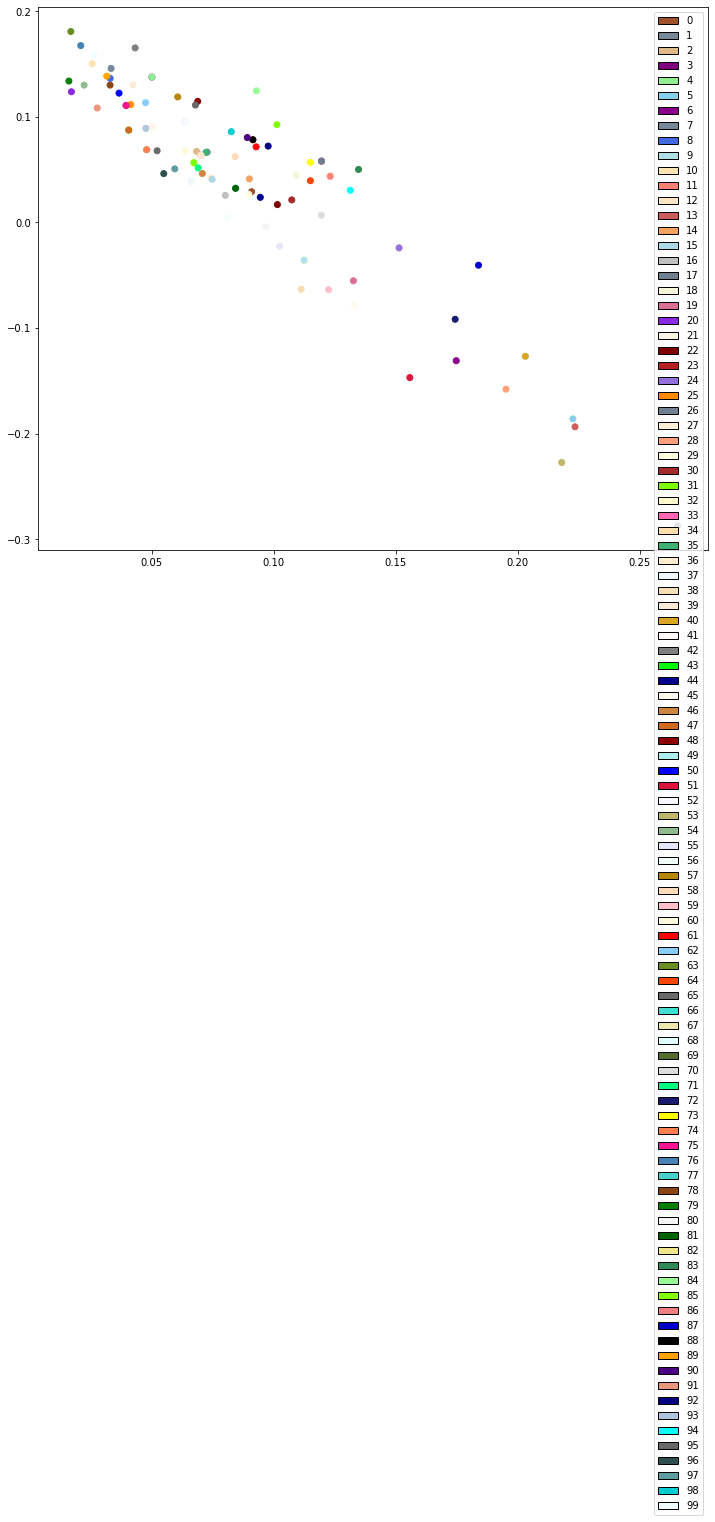

In [14]:
plot_clusters(pca.components_, range(len(data)), legend=True)


(12, 100)


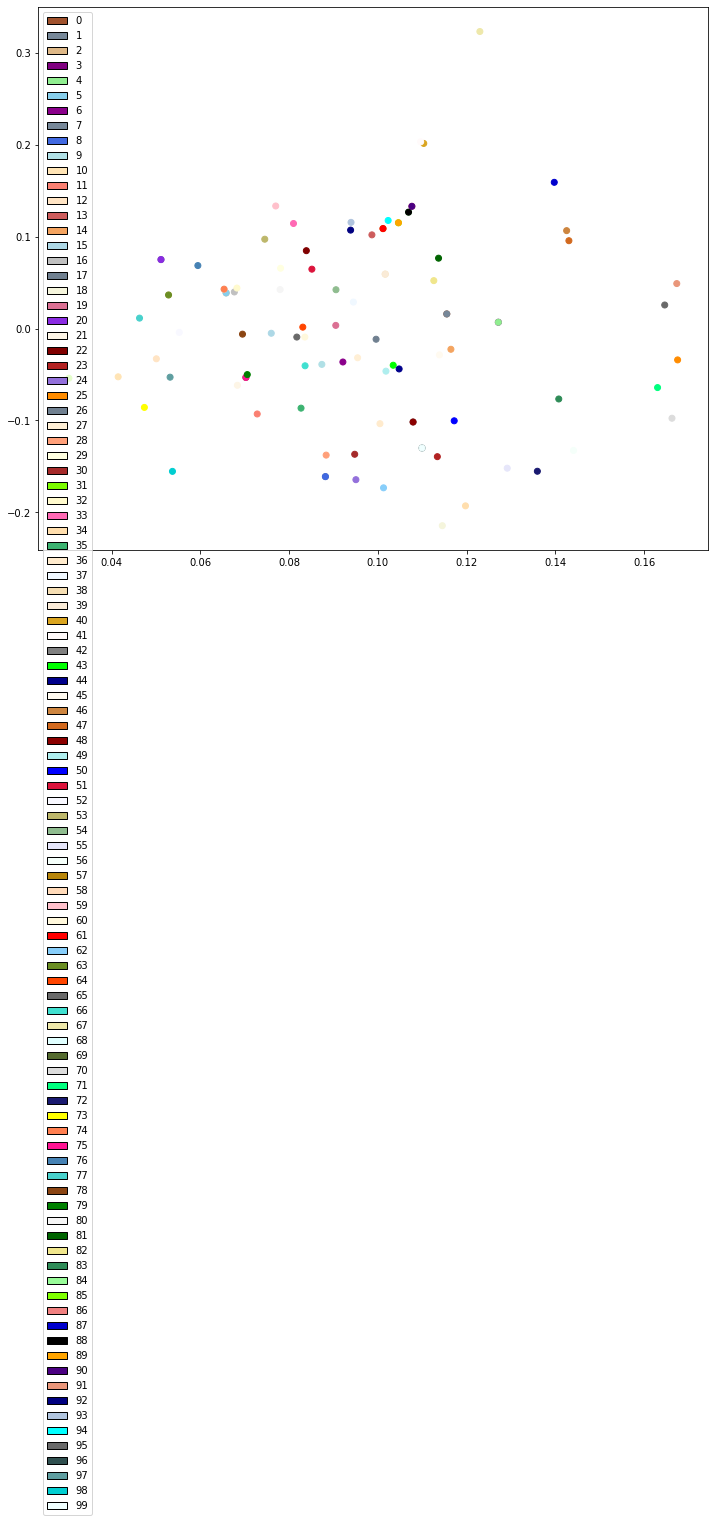

In [19]:
pca = PCA(n_components=len(rf.get_column_labels()))
pca.fit(np.transpose(white))

print(pca.components_.shape)
plot_clusters(pca.components_, range(len(white)), legend=True)


In [21]:
def create_pca(data):
    pca = PCA(n_components=len(rf.get_column_labels()))
    pca.fit(np.transpose(data))
    return pca

In [44]:
mixed_data = []
n_red = 100
n_white = 100
red= rf.read_red(n_red)
white = rf.read_white(n_white)
# print(data[:20])
# print(white[:20])

mixed_data = red

mixed_data = mixed_data.append(white)
pca = create_pca(mixed_data)

In [45]:
names = ['red']*n_red + ['gray']*n_white
names

['red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 '

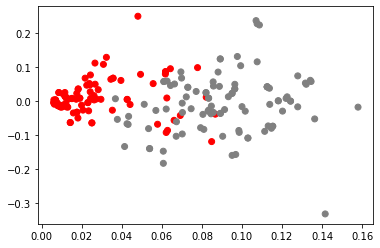

In [46]:
plt.figure(0)
plt.scatter(
    pca.components_[0], 
    pca.components_[1], 
    color=[names[t] for t in range(len(mixed_data))]
)

In [48]:
kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(mixed_data)
kmeans.shape

(200,)

In [49]:
set(kmeans)

{0, 1}

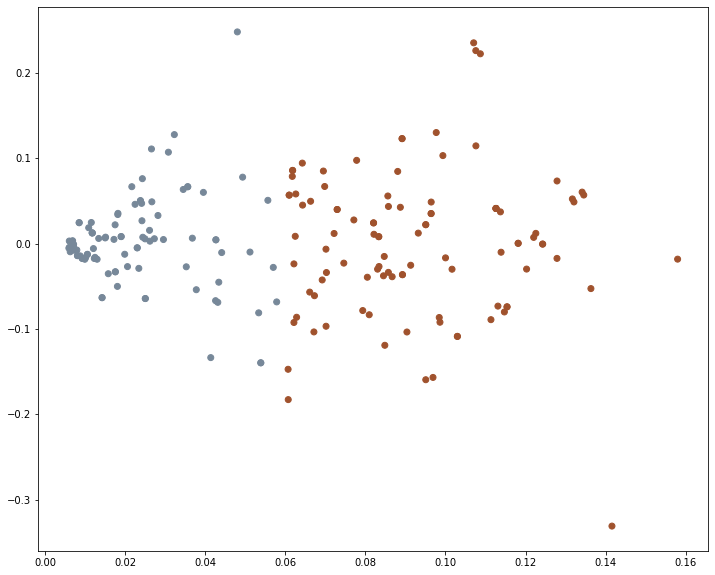

In [51]:
plot_clusters(pca.components_, kmeans)